# Spam classification ( discrete features )

In [1]:
# Given probabilities
p_spam = 40 / 100
p_not_spam = 60 / 100

p_free_given_spam = 30 / 40
p_free_given_not_spam = 20 / 60

# Since "!" is not present, we use the complementary probabilities
p_not_exclamation_given_spam = 20 / 40
p_not_exclamation_given_not_spam = 30 / 60

# Calculate the unnormalized probabilities
prob_spam_given_features = p_spam * p_free_given_spam * p_not_exclamation_given_spam
prob_not_spam_given_features = p_not_spam * p_free_given_not_spam * p_not_exclamation_given_not_spam

print(f"UnNormalized Probability of Spam: {prob_spam_given_features}")
print(f"UnNormalized Probability of Not Spam: {prob_not_spam_given_features}")

# Normalize the probabilities
prob_sum = prob_spam_given_features + prob_not_spam_given_features
normalized_prob_spam = prob_spam_given_features / prob_sum
normalized_prob_not_spam = prob_not_spam_given_features / prob_sum

# Classification decision
if normalized_prob_spam > normalized_prob_not_spam:
    classification = "Spam"
else:
    classification = "Not Spam"

print(f"Normalized Probability of Spam: {normalized_prob_spam}")
print(f"Normalized Probability of Not Spam: {normalized_prob_not_spam}")
print(f"Classification: {classification}")

UnNormalized Probability of Spam: 0.15000000000000002
UnNormalized Probability of Not Spam: 0.09999999999999999
Normalized Probability of Spam: 0.6000000000000001
Normalized Probability of Not Spam: 0.39999999999999997
Classification: Spam


Note that the data below providing #combination of the features is **different** from last cell block

In [2]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB, GaussianNB

# Correctly preparing the dataset
spam_emails = np.array([[1, 1]] * 20 + [[1, 0]] * 20)  # 20 with "free" and "!", 20 with "free" but no "!"
non_spam_emails = np.array([[1, 0]] * 20 + [[0, 1]] * 30 + [[0, 0]] * 10)  # 20 with "free", 30 with "!", 10 with neither
X = np.vstack((spam_emails, non_spam_emails))
y = np.array([1] * 40 + [0] * 60)  # 1 for spam, 0 for not spam

# Training the model
model = GaussianNB()
model.fit(X, y)

# Predicting for an email with "free" but no "!"
target_email_features = np.array([[1, 0]])
prediction = model.predict(target_email_features)

print("The target email is classified as", "Spam." if prediction[0] == 1 else "Not Spam.")


The target email is classified as Spam.


# Gaussian Distribution (continous feature)




sampe a Gaussian distribution data

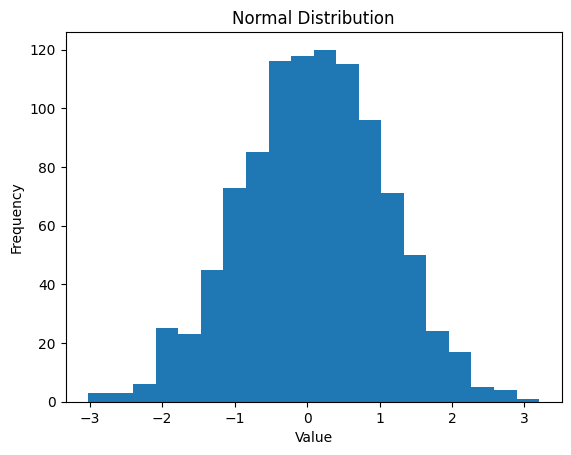

In [3]:
# prompt: demo a normal distribution without numpy implementation

import random
import matplotlib.pyplot as plt

# Define the parameters of the distribution
mean = 0
std_dev = 1

# Generate 1000 random numbers from a normal distribution
data = [random.gauss(mean, std_dev) for _ in range(1000)]

# Plot the histogram of the data
plt.hist(data, bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution')
plt.show()


## fitting data with smooth Gaussian function with standard Gaussian distribution


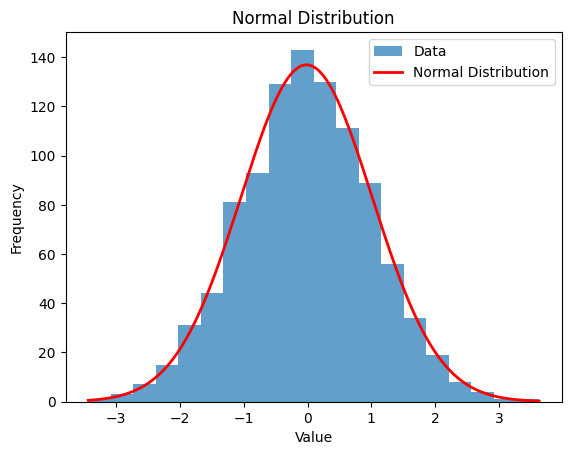

(-0.01561198303894905, 1.0301640540545347)

In [4]:
import random
import matplotlib.pyplot as plt

# Define the parameters of the distribution
mean = 0
std_dev = 1

# Generate 1000 random numbers from a normal distribution
data = [random.gauss(mean, std_dev) for _ in range(1000)]

# Calculate the mean and standard deviation of the generated data
calculated_mean = sum(data) / len(data)
calculated_std_dev = (sum((x - calculated_mean) ** 2 for x in data) / len(data)) ** 0.5

# Plot the histogram of the data
plt.hist(data, bins=20, alpha=0.7, label='Data')

# Plot the normal distribution curve
import numpy as np
x = np.linspace(min(data), max(data), 1000)
y = (1 / (calculated_std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - calculated_mean) / calculated_std_dev) ** 2)
plt.plot(x, y * len(data) * (max(data) - min(data)) / 20, linewidth=2, color='red', label='Normal Distribution')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution')
plt.legend()
plt.show()

(calculated_mean, calculated_std_dev)


In this normal distribution, what is the prob. give a point value?

In [5]:
# prompt: In this normal distribution, what is the prob. give a point value?

import numpy as np
# Calculate the probability density function of the normal distribution at a given point value
def normal_pdf(x, mean, std_dev):
  return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Calculate the probability of a given point value
point_value = 0.0
probability = normal_pdf(point_value, mean, std_dev)

print('Probability of point value {}: {:.4f}'.format(point_value, probability))


Probability of point value 0.0: 0.3989


np.float64(0.07365402806066468)

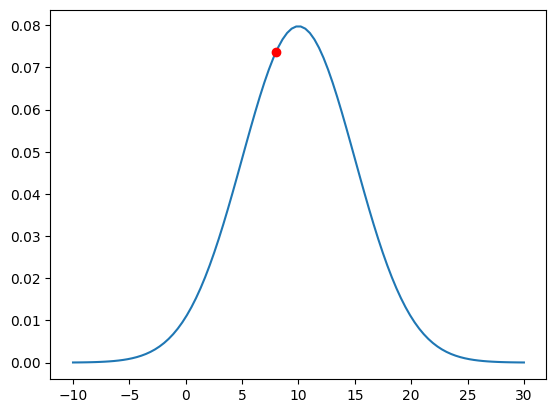

In [6]:
# Create a range of x values to plot
x = np.linspace(-10, 30, 100)

# Calculate the Gaussian distribution for the given parameters
y = normal_pdf(x, mean=10, std_dev=5)

# Plot the Gaussian distribution
plt.plot(x, y)

plt.plot(8, normal_pdf(8, mean=10, std_dev=5), 'ro')
normal_pdf(8, mean=10, std_dev=5)


# Spam classification - continouous features

## likelihood of being spam

Prob. of feature given spam

In [7]:
from math import sqrt, pi, exp

# Given values for the Gaussian function
mean = 15  # mu
std_dev = 5  # sigma (standard deviation)
x = 4  # observed value

# Gaussian probability density function calculation
gaussian_value = 1 / (std_dev * sqrt(2 * pi)) * exp(-((x - mean) ** 2) / (2 * std_dev ** 2))

# This will print the calculated Gaussian value
print(gaussian_value)

0.0070949185692462885


In [8]:
from math import sqrt, pi, exp

# Given values for the Gaussian function
mean = 10  # mu
std_dev = 5  # sigma (standard deviation)
x = 8  # observed value

# Gaussian probability density function calculation
gaussian_value = 1 / (std_dev * sqrt(2 * pi)) * exp(-((x - mean) ** 2) / (2 * std_dev ** 2))

# This will print the calculated Gaussian value
print(gaussian_value)

0.07365402806066468


In [9]:
import numpy as np

# Calculating the Gaussian probability density function
gaussian_pdf = lambda x, mean, std_dev: (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * std_dev ** 2))

# Calculating the probability for the given x
probability_links = gaussian_pdf(x=4, mean=15, std_dev=5)
probability_words = gaussian_pdf(x=400, mean=500, std_dev=150)

prior_probability = 0.4
likelihood = probability_links * probability_words
spam = likelihood * prior_probability
spam

np.float64(6.043886896771274e-06)

Text(0, 0.5, 'Probability Density')

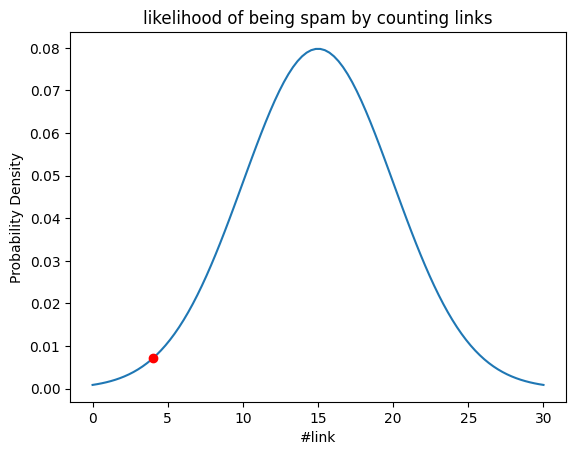

In [10]:
import matplotlib.pyplot as plt

# Define the Gaussian distribution parameters
mean = 15
std_dev = 5
target=4

# Create a range of x values to plot
x = np.linspace(0, 30, 100)

# Calculate the Gaussian distribution for the given parameters
y = gaussian_pdf(x, mean, std_dev)

# Plot the Gaussian distribution
plt.plot(x, y)

# Mark the point of x=4
plt.plot(target, gaussian_pdf(target, mean, std_dev), 'ro')

# Set the plot title and labels
plt.title('likelihood of being spam by counting links')
plt.xlabel('#link')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

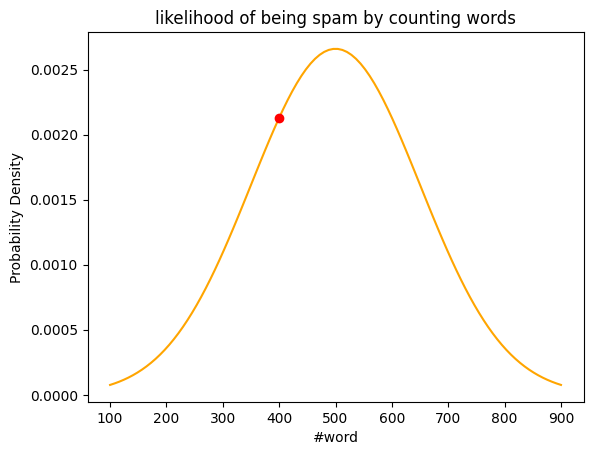

In [11]:
# Define the Gaussian distribution parameters
mean = 500
std_dev = 150
target= 400

# Create a range of x values to plot
x = np.linspace(100, 900, 100)

# Calculate the Gaussian distribution for the given parameters
y = gaussian_pdf(x, mean, std_dev)

# Plot the Gaussian distribution
plt.plot(x, y, color='orange')

# Mark the point of x=4
plt.plot(target, gaussian_pdf(target, mean, std_dev), 'ro')

# Set the plot title and labels
plt.title('likelihood of being spam by counting words')
plt.xlabel('#word')
plt.ylabel('Probability Density')


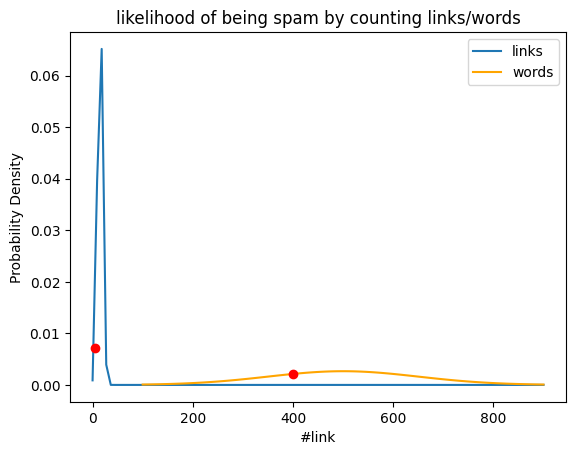

In [12]:
mean = 15
std_dev = 5
target=4
x = np.linspace(0, 900, 100)
y = gaussian_pdf(x, mean, std_dev)
plt.plot(x, y, label='links')
plt.plot(target, gaussian_pdf(target, mean, std_dev), 'ro')


mean = 500
std_dev = 150
target= 400
x = np.linspace(100, 900, 100)
y = gaussian_pdf(x, mean, std_dev)
plt.plot(x, y, label='words', color='orange')
plt.plot(target, gaussian_pdf(target, mean, std_dev), 'ro')


# Set the plot title and labels
plt.title('likelihood of being spam by counting links/words')
plt.xlabel('#link')
plt.ylabel('Probability Density')
plt.legend()

## likelihood of being non-spam

Text(0, 0.5, 'Probability Density')

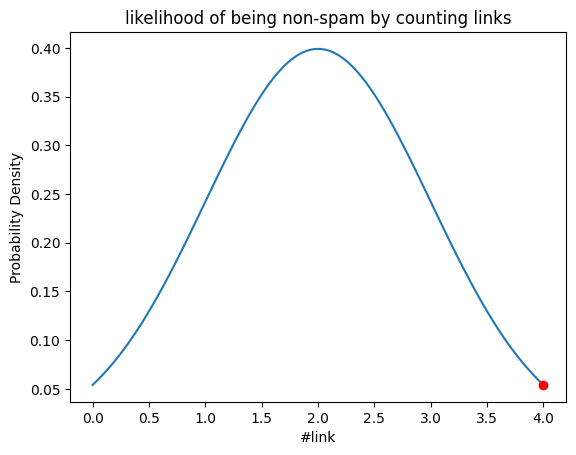

In [13]:
# Define the Gaussian distribution parameters
mean = 2
std_dev = 1
target=4

# Create a range of x values to plot
x = np.linspace(0, 4, 100)

# Calculate the Gaussian distribution for the given parameters
y = gaussian_pdf(x, mean, std_dev)

# Plot the Gaussian distribution
plt.plot(x, y)

# Mark the point of x=4
plt.plot(target, gaussian_pdf(target, mean, std_dev), 'ro')

# Set the plot title and labels
plt.title('likelihood of being non-spam by counting links')
plt.xlabel('#link')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

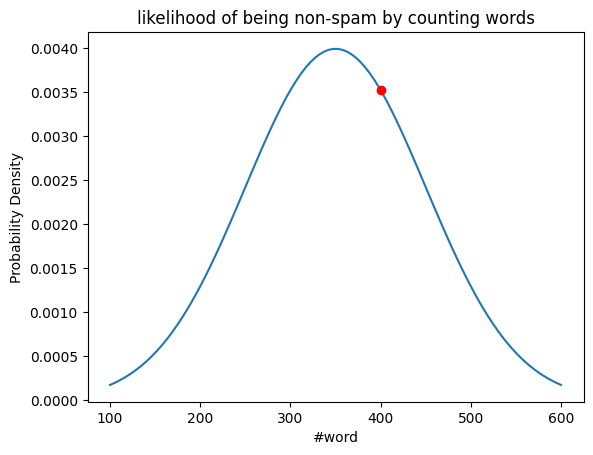

In [14]:
# Define the Gaussian distribution parameters
mean = 350
std_dev = 100
target= 400

# Create a range of x values to plot
x = np.linspace(100, 600, 100)

# Calculate the Gaussian distribution for the given parameters
y = gaussian_pdf(x, mean, std_dev)

# Plot the Gaussian distribution
plt.plot(x, y)

# Mark the point of x=4
plt.plot(target, gaussian_pdf(target, mean, std_dev), 'ro')

# Set the plot title and labels
plt.title('likelihood of being non-spam by counting words')
plt.xlabel('#word')
plt.ylabel('Probability Density')

<ipython-input-15-c08d470f8ae6>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


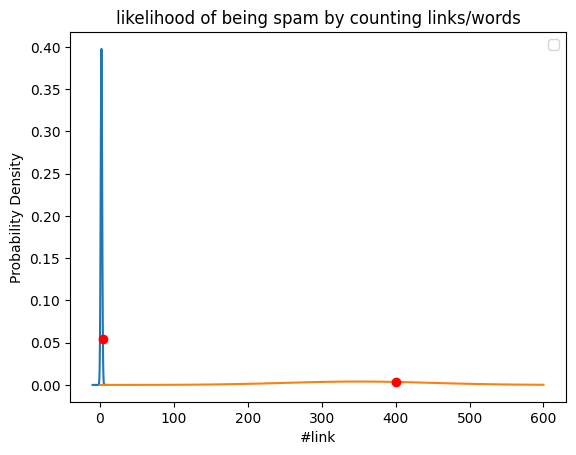

In [15]:
mean = 2
std_dev = 1
target=4

x = np.linspace(-10, 10, 100)
y = gaussian_pdf(x, mean, std_dev)
plt.plot(x, y)
plt.plot(target, gaussian_pdf(target, mean, std_dev), 'ro')


mean = 350
std_dev = 100
target= 400

x = np.linspace(0, 600, 100)
y = gaussian_pdf(x, mean, std_dev)
plt.plot(x, y)
plt.plot(target, gaussian_pdf(target, mean, std_dev), 'ro')


# Set the plot title and labels
plt.title('likelihood of being spam by counting links/words')
plt.xlabel('#link')
plt.ylabel('Probability Density')
plt.legend()

In [16]:
probability_links = gaussian_pdf(x=4, mean=2, std_dev=1)
probability_words = gaussian_pdf(x=400, mean=350, std_dev=100)

prior_probability = 0.6
likelihood = probability_links * probability_words
non_spam=likelihood * prior_probability
spam, non_spam

(np.float64(6.043886896771274e-06), np.float64(0.00011405008360671543))

In [17]:
# prompt: normalize spam and non_spam, and show them in percentage

# Normalize spam and non_spam probabilities
total_probability = spam + non_spam
normalized_spam = spam / total_probability * 100
normalized_non_spam = non_spam / total_probability * 100

# Print the normalized probabilities as percentages
print("Spam probability:", round(normalized_spam, 2), "%")
print("Non-spam probability:", round(normalized_non_spam, 2), "%")
spam < non_spam

Spam probability: 5.03 %
Non-spam probability: 94.97 %


np.True_

# Iris Flower Classification with 2 features (for visualization purpose)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


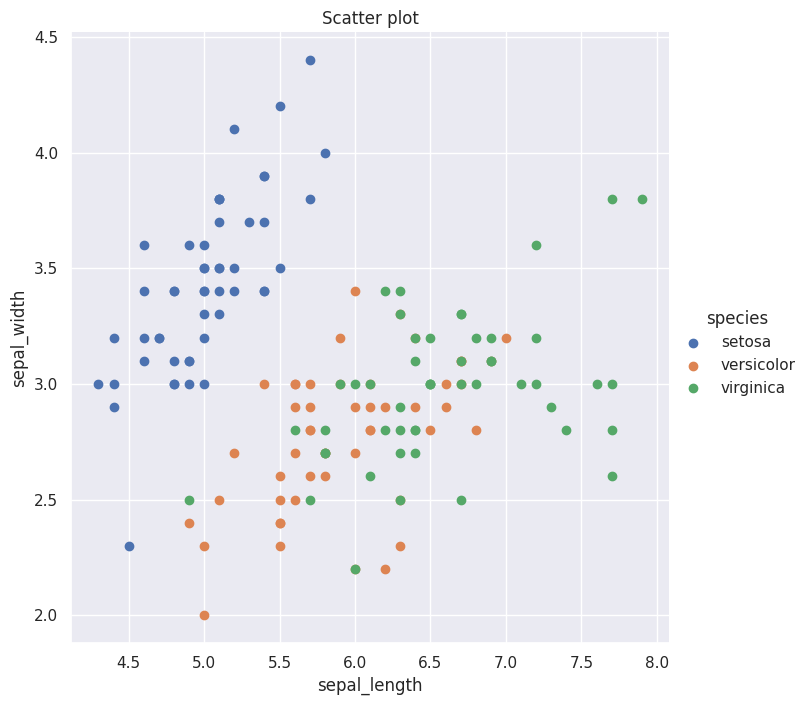

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
%matplotlib inline
sns.set()

#Load the data set
iris = sns.load_dataset("iris")
iris.info()

#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(iris, hue="species", height=7) .map(plt.scatter,"sepal_length", "sepal_width", )  .add_legend()
plt.title('Scatter plot')
df1 = iris[["sepal_length", "sepal_width",'species']]

## Calculate P(feature | class), P(class)


In [19]:
# p(feature|class)
mu_list = np.split(df1.groupby('species').mean().values,[1,2])
std_list = np.split(df1.groupby('species').std().values,[1,2], axis = 0)
# p(class)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)

# For vis purpose: our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

In [20]:
mu_list

[array([[5.006, 3.428]]), array([[5.936, 2.77 ]]), array([[6.588, 2.974]])]

In [21]:
std_list

[array([[0.35248969, 0.37906437]]),
 array([[0.51617115, 0.31379832]]),
 array([[0.63587959, 0.32249664]])]

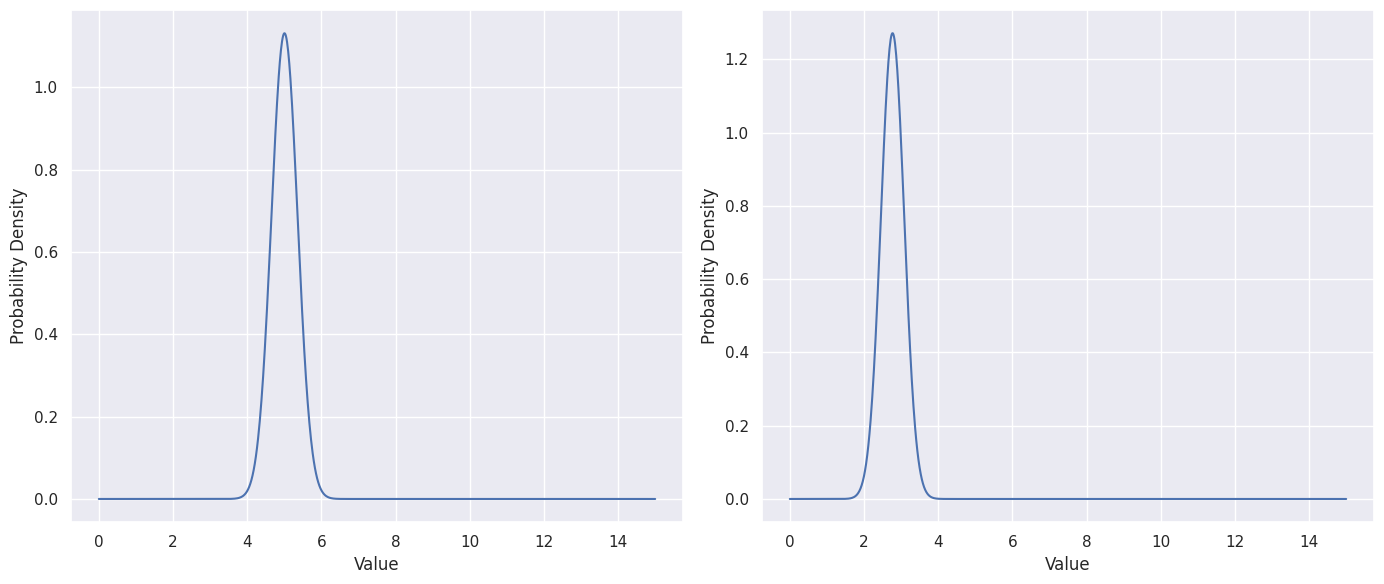

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot settings
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
x = np.linspace(0, 15, 1000)

for i in range(2):  # Loop over features
    for mu, std in zip(mu_list[i], std_list[i]):  # Loop over classes
        y = norm.pdf(x, mu[i], std[i])
        axs[i].plot(x, y, label=f"Class {mu[i]}, Feature {i+1}")
    # axs[i].set_title(f'Gaussian Distributions of Feature {i+1}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Probability Density')
    # axs[i].legend()

plt.tight_layout()
plt.show()


In [23]:
pi_list

array([0.33333333, 0.33333333, 0.33333333])

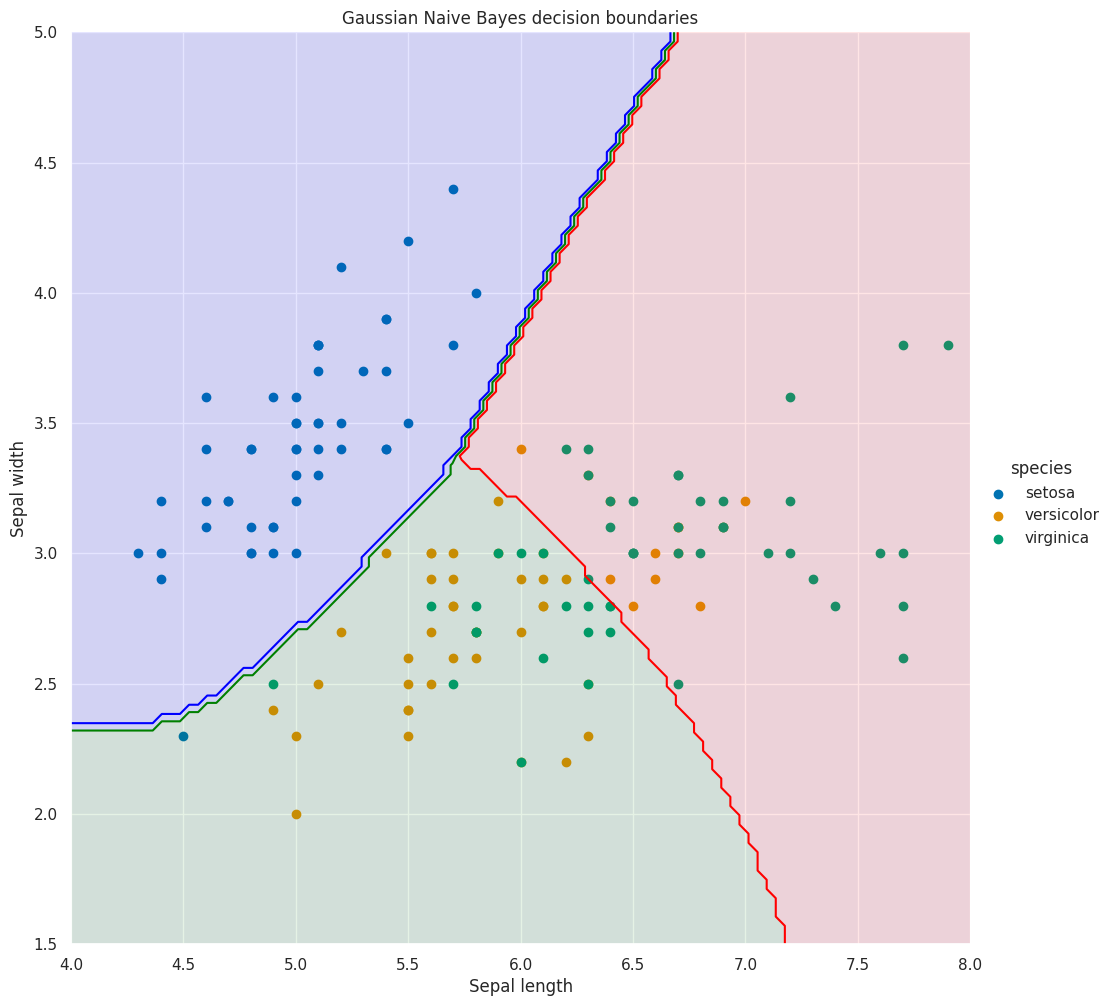

In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from scipy.stats import norm
%matplotlib inline
sns.set()

# Load the dataset
iris = sns.load_dataset("iris")

# Prepare the data
df1 = iris[["sepal_length", "sepal_width", 'species']]

# Calculate mean and std for each class
mu_list = df1.groupby('species').mean().values
std_list = df1.groupby('species').std().values

# Calculate prior probabilities
pi_list = df1['species'].value_counts().values / len(df1)

# Prepare the meshgrid
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

def predict_NB_gaussian_class(X, mu_list, std_list, pi_list):
    scores_list = []
    classes = len(mu_list)

    for p in range(classes):
        # p(feature|class) * p(class)
        score = (norm.pdf(x = X[0], loc = mu_list[p][0], scale = std_list[p][0]) *
                 norm.pdf(x = X[1], loc = mu_list[p][1], scale = std_list[p][1]) *
                 pi_list[p])
        scores_list.append(score)

    return np.argmax(scores_list)

# Computing the predicted class for each value on the grid
zz = np.array([predict_NB_gaussian_class(np.array([xx,yy]), mu_list, std_list, pi_list) for xx, yy in zip(np.ravel(X), np.ravel(Y))])

# Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

# Plotting
color_list = ['Blues', 'Greens', 'Reds']
my_norm = colors.Normalize(vmin=-1., vmax=1.)
g = sns.FacetGrid(iris, hue="species", height=10, palette='colorblind').map(plt.scatter, "sepal_length", "sepal_width").add_legend()
my_ax = g.ax

# Plot the filled and boundary contours
my_ax.contourf(X, Y, Z, 2, alpha=.1, colors=('blue', 'green', 'red'))
my_ax.contour(X, Y, Z, 2, alpha=1, colors=('blue', 'green', 'red'))

# Add axis labels and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()


## Full Feature study

single feature, and pair-wise features

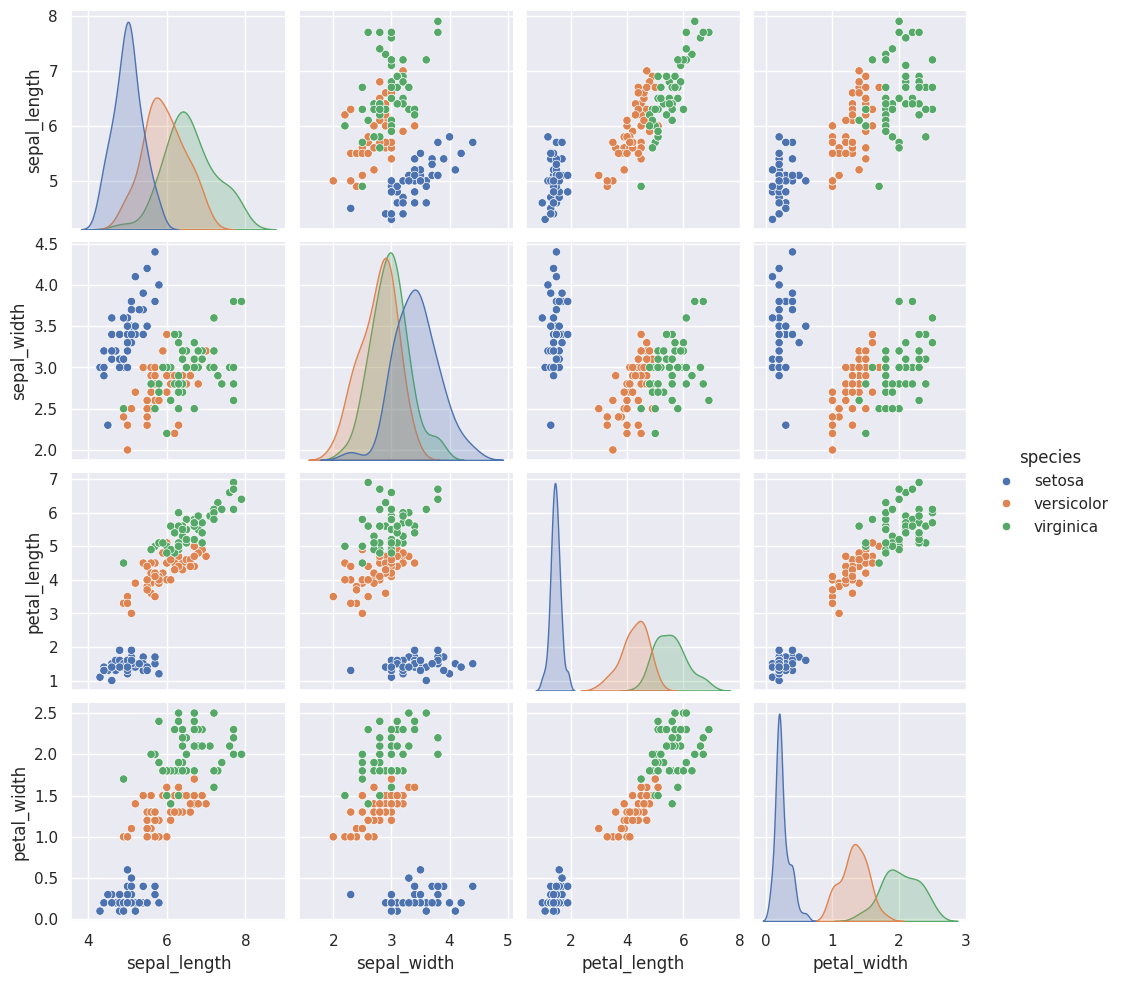

In [25]:
sns.pairplot(iris,hue="species")
plt.show()

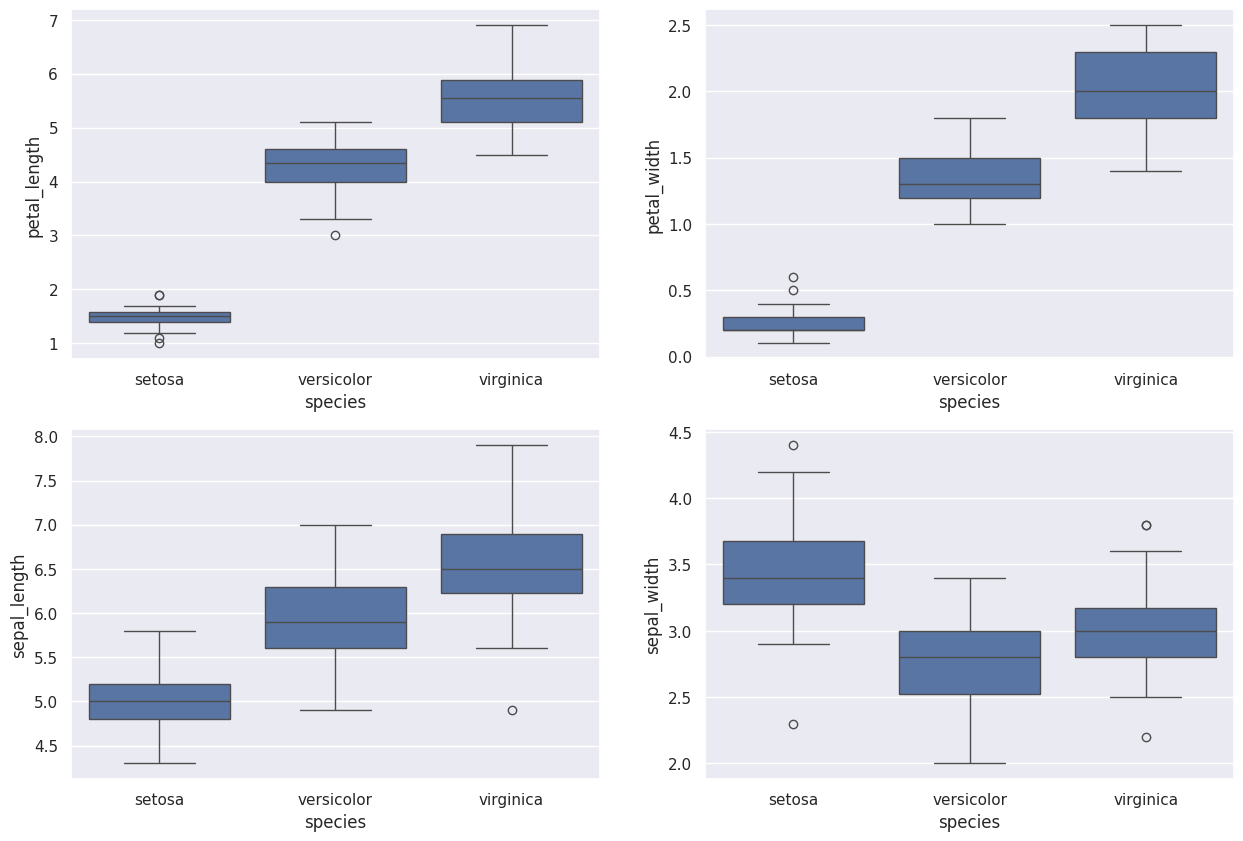

In [26]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='petal_width',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.show()

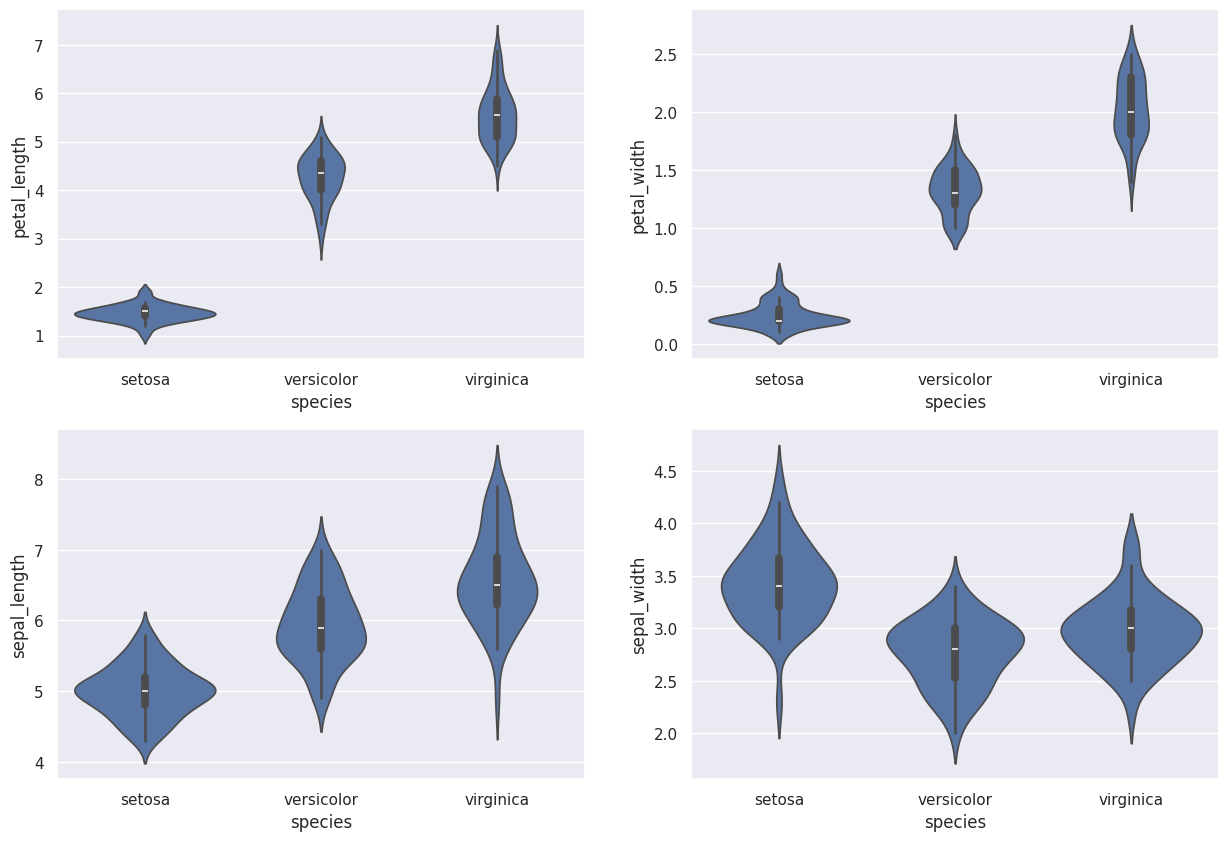

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=iris)
plt.show()



```
# This is formatted as code
```

## Naive Bayes Classification without Sklearn

In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()

# Load the dataset
iris = sns.load_dataset("iris")
# Convert 'species' to an integer category
iris['species'], species_mapping = pd.factorize(iris['species'])
df = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']]

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Calculate mean, std, and priors for each class from the training set
# Note: Use numeric species now
mu_list = train_df.groupby('species').mean().values
std_list = train_df.groupby('species').std().values


# Prior
pi_list = train_df['species'].value_counts().sort_index().values / len(train_df)

# Define the prediction function for Gaussian Naive Bayes
def predict_NB_gaussian_class(X, mu_list, std_list, pi_list):
    scores_list = []
    classes = len(mu_list)

    for p in range(classes):
        score = 1  # Initialize score as 1 for multiplication
        for feature in range(len(X)):
            # Calculate the probability of each feature given the class
            score *= norm.pdf(x = X[feature], loc = mu_list[p][feature], scale = std_list[p][feature])
            # class = 1, likelihood = P(feature 1|class1)*P(feature 2|class1)P(feature 3|class1)*P(feature 4|class1)


            # P (feature 1| class 1) = Gaussian(mu_11, std_11)
            # 12 Guassian Dist -> Conditional Prob -> Likelihood
            # class = 2, likelihood = P(feature 1|class2)*P(feature 2|class2)P(feature 3|class2)*P(feature 4|class2)
            # class = 3, ...

        # score is likelihood
        score *= pi_list[p]
        scores_list.append(score)
        # p_c1, p_c2, p_c3 = 0.2, 0.4, 0.3

    return np.argmax(scores_list)

# Convert test data into a format suitable for prediction
X_test = test_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y_test = test_df['species'].values

# Predict the class for each instance in the test set
predictions = np.array([predict_NB_gaussian_class(x, mu_list, std_list, pi_list) for x in X_test])

# Now, predictions and y_test are both in numeric form, so we can directly compare them

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.98


## Sklearn implementation


In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.98
